In [2]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

hcv = pd.read_csv("D:/Datasets/HCV-Egy-Data/HCV-Egy-Data.csv")
hcv.head(4)

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
0,56,1,35,2,1,1,1,2,2,2,...,5,5,5,655330,634536,288194,5,5,13,2
1,46,1,29,1,2,2,1,2,2,1,...,57,123,44,40620,538635,637056,336804,31085,4,2
2,57,1,33,2,2,2,2,1,1,1,...,5,5,5,571148,661346,5,735945,558829,4,4
3,49,2,33,1,2,1,2,1,2,1,...,48,77,33,1041941,449939,585688,744463,582301,10,3


In [3]:
data = hcv.copy()
data2 = data.drop(columns=['Baselinehistological staging'])
data2.head(4)


,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading
0,56,1,35,2,1,1,1,2,2,2,...,81,5,5,5,655330,634536,288194,5,5,13
1,46,1,29,1,2,2,1,2,2,1,...,113,57,123,44,40620,538635,637056,336804,31085,4
2,57,1,33,2,2,2,2,1,1,1,...,116,5,5,5,571148,661346,5,735945,558829,4
3,49,2,33,1,2,1,2,1,2,1,...,88,48,77,33,1041941,449939,585688,744463,582301,10


In [4]:
x_norm = StandardScaler().fit_transform(data2)

print(x_norm.shape)
print(np.mean(x_norm), np.std(x_norm))

(1385, 28)
3.8110595419830026e-17 1.0


In [6]:
atribut_array = ['fitur'+str(i) for i in range(x_norm.shape[1])]

x_norm_df = pd.DataFrame(x_norm, columns=atribut_array)
x_norm_df.tail(4)

,fitur0,fitur1,fitur2,fitur3,fitur4,fitur5,fitur6,fitur7,fitur8,fitur9,...,fitur18,fitur19,fitur20,fitur21,fitur22,fitur23,fitur24,fitur25,fitur26,fitur27
1381,0.988897,-0.979276,1.323110,-1.031544,0.994959,1.007974,-1.005067,-0.997836,-1.002168,-1.007974,...,0.927259,0.526054,-0.748807,1.069398,-0.309697,-1.236759,0.366648,-0.809510,-0.205921,0.059234
1382,-0.492022,-0.979276,-0.640203,0.969420,0.994959,-0.992089,-1.005067,-0.997836,0.997836,-1.007974,...,1.232643,0.147116,-1.702479,-1.334782,0.061369,-0.077694,1.813706,0.211971,-0.489235,-0.935186
1383,0.647146,-0.979276,0.096039,0.969420,-1.005067,-0.992089,0.994959,1.002168,0.997836,-1.007974,...,-1.401293,-1.330745,-0.100311,1.352243,-1.274928,-1.448806,0.795717,-1.078409,1.512293,1.302260
1384,0.988897,1.021163,-0.640203,-1.031544,0.994959,1.007974,0.994959,-0.997836,0.997836,-1.007974,...,1.194470,-0.724443,-0.481780,0.079442,1.694779,0.076851,-1.012273,-1.087692,-1.088823,0.805050


In [7]:
X = x_norm_df
#X.head(4)
y = data['Baselinehistological staging']
 

In [11]:
data['y'] = data['Baselinehistological staging']
classes = ['None', 'Portal Fibrosis', 'Few Septa', 'Many Septa', 'Cirrhosis']

In [13]:
data.y[data.y == 1] = classes[1]
data.y[data.y == 2] = classes[2]
data.y[data.y == 3] = classes[3]
data.y[data.y == 4] = classes[4]

explained variance ratio (first two components): [0.06767914 0.04421373]


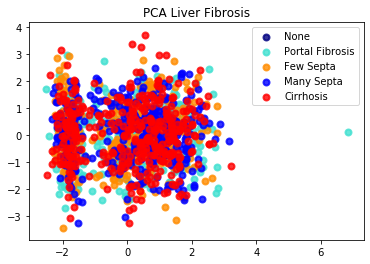

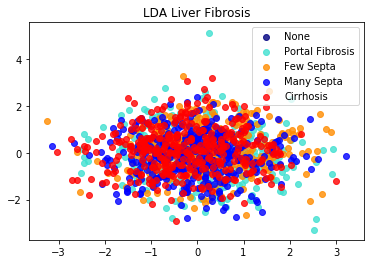

In [15]:
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['navy', 'turquoise', 'darkorange', 'blue', 'red']
lw = 2

for color, i, target in zip(colors, [0, 1, 2, 3, 4], classes):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA Liver Fibrosis')

plt.figure()
for color, i, target in zip(colors, [0, 1, 2, 3, 4], classes):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA Liver Fibrosis')

plt.show()

In [18]:
from sklearn.decomposition import FastICA

ica = FastICA(n_components=2, random_state=0)
X_r3 = ica.fit(X).transform(X)
X_r3.shape


(1385, 2)

In [20]:
# Percentage of variance explained for each components
#print('explained variance ratio (first two components): %s'
 #     % str(ica.explained_variance_ratio_))

Text(0.5, 1.0, 'ICA Liver Fibrosis')

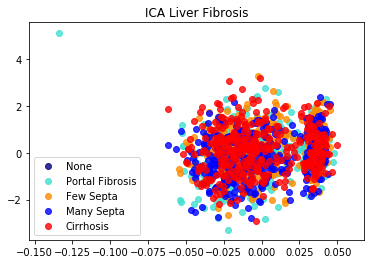

In [21]:
plt.figure()
for color, i, target in zip(colors, [0, 1, 2, 3, 4], classes):
    plt.scatter(X_r3[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('ICA Liver Fibrosis')

In [23]:
print(lda.explained_variance_ratio_)
print(pca.explained_variance_ratio_)


[0.5262457  0.27822843]
[0.06767914 0.04421373]
[[ 9.37728587e-04  2.14567293e-04  9.92783406e-04 -3.34222908e-04
  -7.18058734e-04 -1.67150308e-04 -7.42009199e-04 -6.41177941e-04
  -1.04697607e-03 -1.55772747e-03  1.72114035e-03  9.84795483e-04
   6.04835463e-05 -1.34454640e-03  5.46756329e-04  3.13885972e-04
  -8.70817994e-04  1.02761805e-03 -6.45915323e-04 -1.11719168e-03
  -2.03124739e-04 -1.49251023e-04 -1.05380918e-04  1.21013524e-03
  -1.07907044e-02 -1.10228764e-02 -1.11344189e-02  1.07554972e-03]
 [-2.31809319e-03 -9.42772666e-04  3.43407202e-03 -1.31668916e-03
   1.09096182e-02  8.12657890e-04  5.89479228e-06 -3.25298713e-03
  -3.33430251e-03 -7.23184372e-03 -4.02005769e-03  6.53648213e-03
   4.67810416e-03  9.02997730e-03  5.20667829e-05  2.24547388e-03
   1.66882812e-03 -2.56768507e-03  7.53318437e-03  1.10921900e-03
  -8.50711553e-03 -5.51546498e-03 -3.66938900e-03 -3.22729693e-03
  -7.19659022e-05 -3.54720345e-04 -2.55664293e-04 -2.43651901e-03]]


In [24]:
principal_hcv_df = pd.DataFrame(data = X_r, columns=['principal component 1', 'principal component 2'])
principal_hcv_df

,principal component 1,principal component 2
0,-1.727251,0.644119
1,0.121603,-0.267774
2,0.548721,3.721846
3,2.064957,0.887014
4,6.849728,0.105890
...,...,...
1380,-2.057915,3.170771
1381,-0.763959,1.317438
1382,1.043464,2.164755
1383,0.807146,-1.085747


In [26]:
ld_hcv_df = pd.DataFrame(data = X_r2, columns=['linear discriminant 1', 'linear discriminants 2'])
ld_hcv_df

,linear discriminant 1,linear discriminants 2
0,2.647112,1.658397
1,-0.300597,3.250756
2,1.807805,-1.461309
3,-0.335746,0.009063
4,0.258847,5.118673
...,...,...
1380,-0.437417,0.274887
1381,-0.138978,0.426782
1382,-0.745324,1.234803
1383,0.329982,0.761056


In [27]:
ica_hcv_df = pd.DataFrame(data = X_r3, columns=['independent component 1', 'independent component 2'])
ica_hcv_df

,independent component 1,independent component 2
0,0.033603,0.003848
1,-0.002370,-0.004367
2,-0.013811,0.083228
3,-0.041062,0.017380
4,-0.133861,0.001845
...,...,...
1380,0.037492,0.071828
1381,0.013688,0.031463
1382,-0.022242,0.049968
1383,-0.014938,-0.020740
